#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Load Dataset

In [19]:
# Read CSV
url = 'https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv'
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [20]:
duplicate = df.duplicated().sum()
if duplicate <= 0:
    print('False')
else:
    print('True')

True


Periksa apakah ada missing values

In [21]:
missing_values = df.isna().any()
print(missing_values)

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool


Periksa outlier dengan boxplot untuk setiap kolom feature

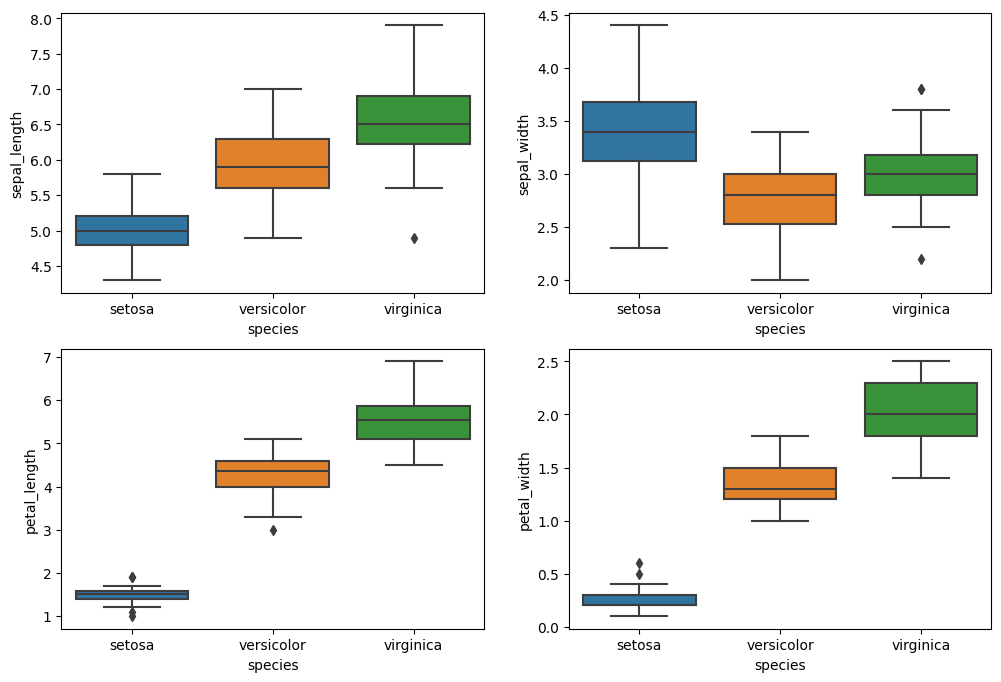

In [22]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.boxplot(x= df['species'], y="sepal_length", data=df)
plt.subplot(2, 2, 2)
sns.boxplot(x= df['species'], y="sepal_width", data=df)
plt.subplot(2, 2, 3)
sns.boxplot(x= df['species'], y="petal_length", data=df)
plt.subplot(2, 2, 4)
sns.boxplot(x= df['species'], y="petal_width", data=df)
plt.show()

Pisahkan dataset menjadi variabel independen dan variabel dependen

In [23]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

Lakukan fitur scaling pada variabel X_train dan X_test. 

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Logistic Regression

Bangun model dan ukur accuracy nya

In [26]:
model = LogisticRegression(random_state=0)
print(model.fit(X_train_scaled, y_train))

LogisticRegression(random_state=0)


Uji model dengan dataset test

In [27]:
y_pred = model.predict(X_test_scaled)
print(y_pred)

['versicolor' 'versicolor' 'virginica' 'setosa' 'versicolor' 'virginica'
 'versicolor' 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'virginica'
 'versicolor' 'virginica']


In [28]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:{:0.4f}".format(accuracy))

Confusion Matrix
 [[5 0 0]
 [0 5 1]
 [0 0 4]]
Accuracy Score:0.9333


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [29]:
nb_model = GaussianNB()
print(nb_model.fit(X_train_scaled, y_train))

GaussianNB()


Uji hasil model dengan data test

In [30]:
y_pred_nb = nb_model.predict(X_test_scaled)
print(y_pred_nb)

['versicolor' 'versicolor' 'virginica' 'setosa' 'virginica' 'virginica'
 'versicolor' 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'virginica'
 'versicolor' 'versicolor']


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [31]:
cm = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix\n",cm)

accuracy = accuracy_score(y_test, y_pred_nb)
print("Accuracy Score:{:0.4f}".format(accuracy))

Confusion Matrix
 [[5 0 0]
 [0 5 1]
 [0 0 4]]
Accuracy Score:0.9333


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [32]:
k = 5
knn_model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
print(knn_model.fit(X_train_scaled, y_train))

KNeighborsClassifier(metric='euclidean')


Uji model dengan data test

In [33]:
y_pred_knn = knn_model.predict(X_test_scaled)

Ukur akurasi dari model K-Nearest Neighbor

In [34]:
cm = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix\n",cm)

accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy Score:{:0.4f}".format(accuracy))

Confusion Matrix
 [[5 0 0]
 [0 5 1]
 [0 0 4]]
Accuracy Score:0.9333


#Kesimpulan
Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah... 

Tidak ada akurasi tertingga karena semua accuracy score mempunyai nilai yang dengan jumlah yang sama yaitu 0.9333